<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
پاییز ۱۳۹۷
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین عملی بخش چهارم
            	<br/>
			</font>
طراح: علیرضا موسوی 
			<br/><br/> 
موعد تحویل: ۱۶ آذر ساعت ۲۳:۵۹ 
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما خواسته می‌شود تا تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال اول
        </font>
        <hr/>
        الف) در این بخش می‌خواهیم صحت قضیه حد مرکزی را بررسی کنیم. نمودار‌های خواسته شده در این سوال را از طریق نمونه‌گیری رسم کنید.
        <br/>
        <ul>
            <li>
        ابتدا نمودار تابع جگالی احتمال متغیر تصادفی $X \sim \Gamma(1, 0.5)$ را رسم کنید. خواهید دید که هیچ شباهتی به توزیع نرمال ندارد!
            </li>
        </ul>
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

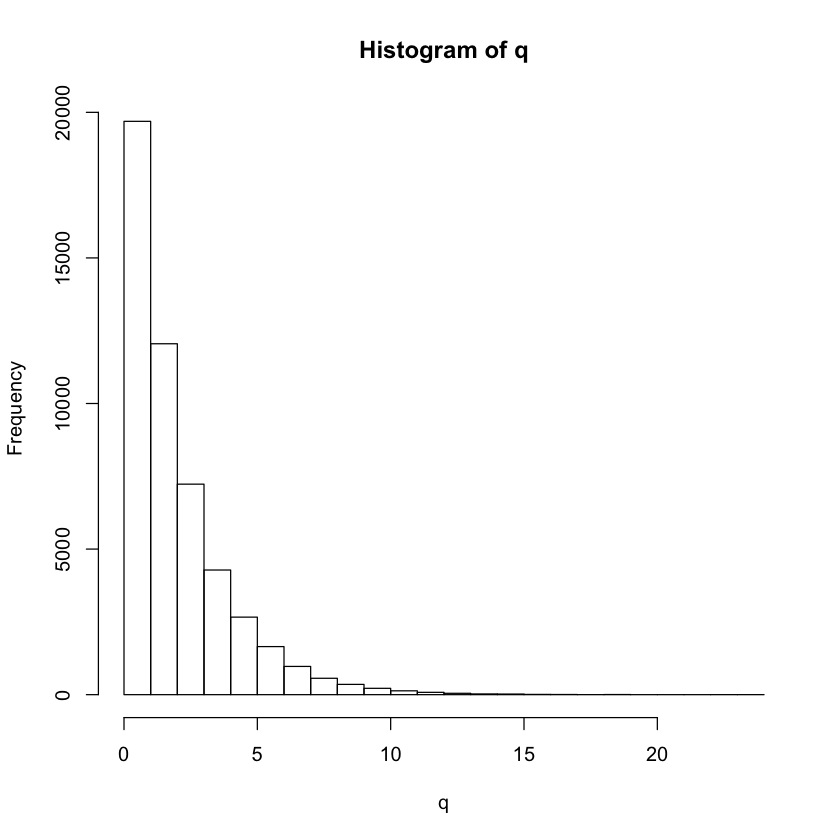

In [3]:
q <- rgamma(50000,1,0.5)
hist(q)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
          متغیر تصادفی $\bar{X}$ را به صورت زیر در نظر بگیرید.
            <br/>
            <div align="center">
                <font size = 6>
               $\bar{X} = \frac{\sum_{i=1}^{n} X_i}{n}$
               </font>
            </div>
            می‌دانیم هنگامی‌که $n \rightarrow \infty$ داریم $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$ که $\mu = \mathbf{E}(X_i)$ و $\sigma = \sqrt{Var(X_i)}$ است.
            <ul>
                <li>
                به ازای $n = 1000, n = 100, n = 10$ نمودار چگالی احتمال $\bar{X}$ را رسم کنید و هرکدام از آن‌ها را با توزیع نرمال متناظرش مقایسه کنید. (چگالی هر $\bar{X}$ و نرمال متناظرش را در یک نمودار رسم کنید تا قابل مقایسه کردن باشد!)
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

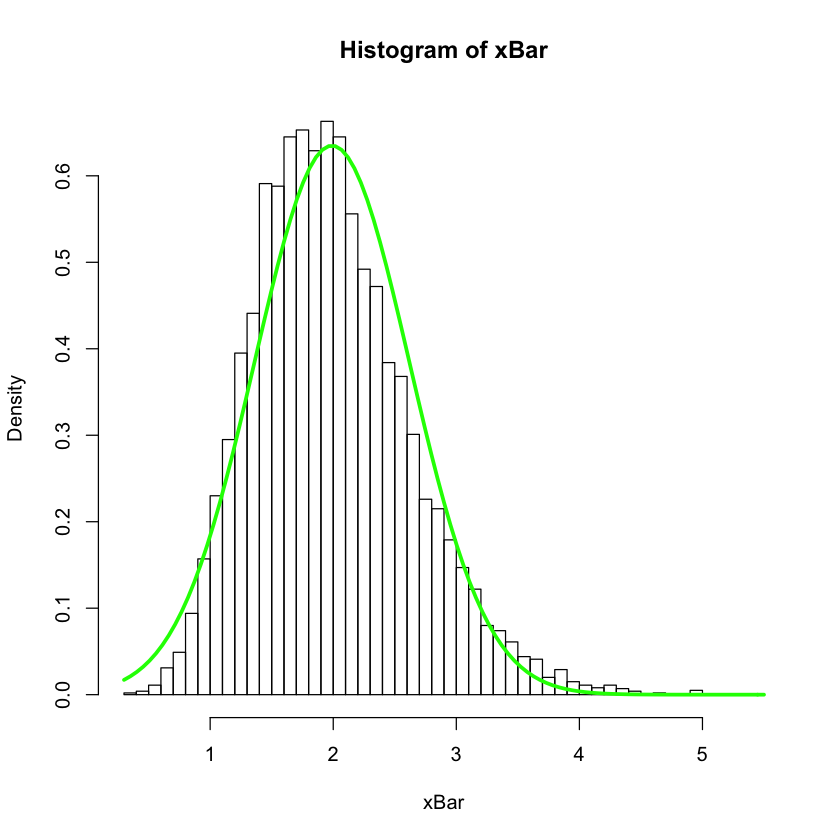

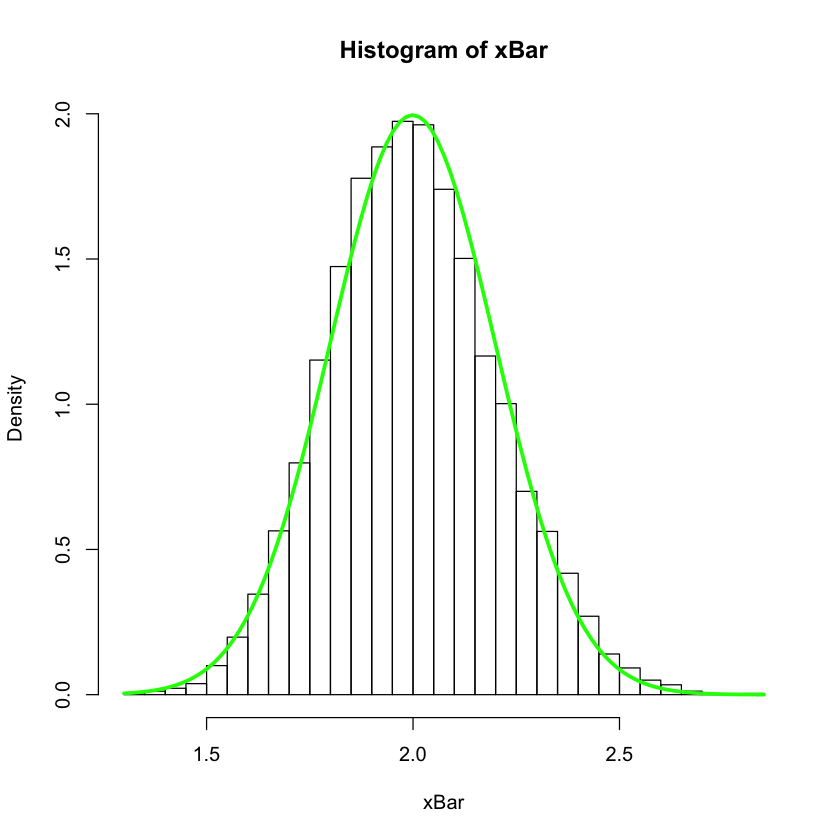

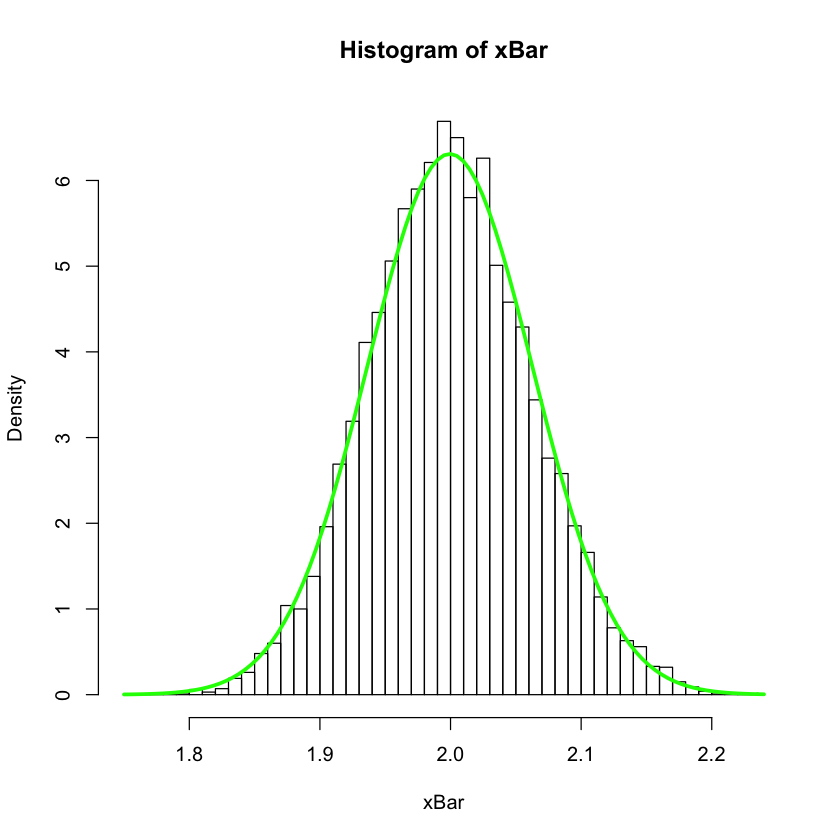

In [13]:
findXBar <- function(n){
    h = vector('numeric', 0)
  j = vector('numeric', n)
  xBar = vector('numeric', 2)
  l = 0
  for(i in 1:10000){
    j = rgamma(n,1,0.5)
    xBar[i] = mean(j)
    h = append(h,j)
  }
  m = mean(h)
  sigma = sd(h)
  hist(xBar, breaks=50, freq=F)
  curve(dnorm(x, mean=m, sd=sigma/sqrt(n)), add=TRUE, col='green', lwd=3) 
}
findXBar(10)
findXBar(100)
findXBar(1000)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        ب) در این بخش می‌خواهیم ببینیم حدود بالایی که توسط نامساوی‌های چبیشف و مارکوف به‌دست می‌آیند تا چه حد به احتمال واقعی نزدیک هستند. مجددا فرض کنید $X \sim \Gamma(1, 0.5)$
        <ul>
            <li>
               فرض کنید $f(\varepsilon) = P(|X - \mu| \geq  \varepsilon)$ و $g(\varepsilon) = \frac{Var(X)}{\varepsilon^2}$. دو تابع $f$ و $g$ را بر حسب $\varepsilon$ در یک نمودار رسم کنید. با توجه به نتیجه، آیا حد بالای چبیشف می‌تواند تخمین خوبی از مقدار $P(|X - \mu| \geq \varepsilon)$ باشد؟ 
            </li>
        </ul>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

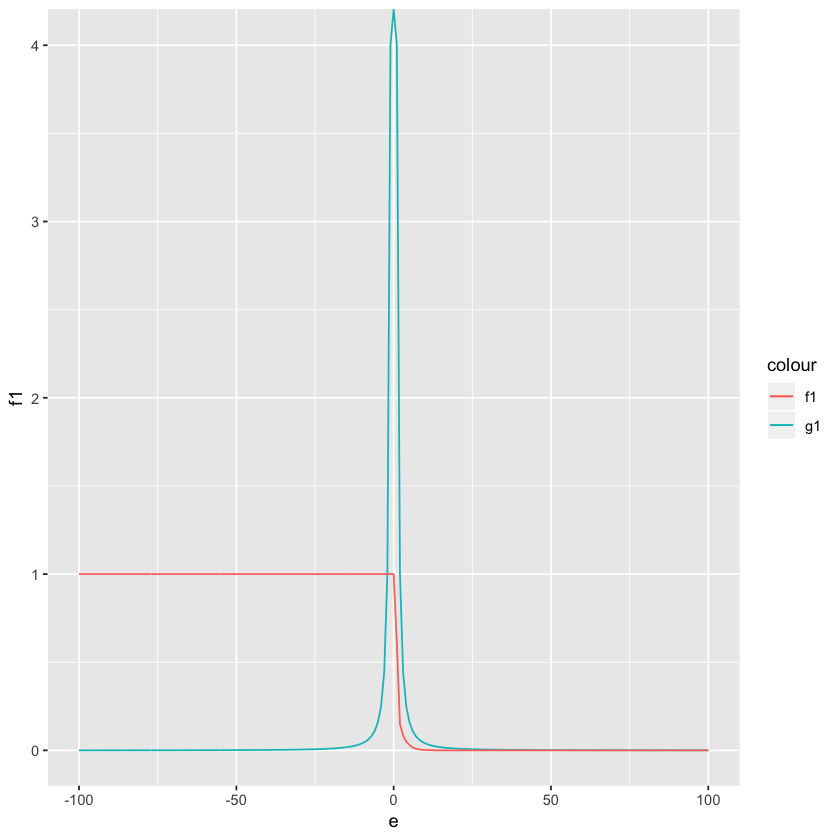

In [14]:
library(ggplot2)
q <- rgamma(5000,1,0.5)
m <- mean(q)
p<-0
f1 <- function(e){
  counter <- 0
  for(i in 1:5000){
    if(abs(q[i]-m) >= e){
      counter = counter + 1
    }
  }
  p <- counter/5000
  return(p)
}
g1 <- function(e){
  return(var(q)/(e*e))
}

e <- sample(c(-100:100),1000,replace = TRUE)
d <- sapply(e,FUN = f1)
z <- sapply(e,FUN = g1)
dt1 <- data.frame(e= e, f1 = d, g1 = z)
dt2 <- data.frame(e= e, f1 =z)
ggplot(mapping = aes(e,f1)) + 
    geom_line(data = dt2,mapping = aes( colour = "g1")) +  geom_line(data = dt1,mapping = aes( colour = "f1")) 


In [ ]:
برای مفادیر بسیار کوچک و نزدیک به ۰ بله و همچنین برای مقادیر مثبت

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                قسمت بالا را برای نامساوی مارکوف تکرار کنید(توجه کنید چون گاما متغیر تصادفی نامنفی است می‌توانیم از نامساوی مارکوف استفاده کنیم). یعنی این بار $f(\varepsilon) = P(X \geq \varepsilon)$ و $g(\varepsilon) = \frac{\mathbf{E}(X)}{\varepsilon}$. با مقایسه این نتیجه با نتیجه بالا، کدام از یک این دو نامساوی حد بالای نزدیک‌تری می‌دهد؟
            </li>
        </ul>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

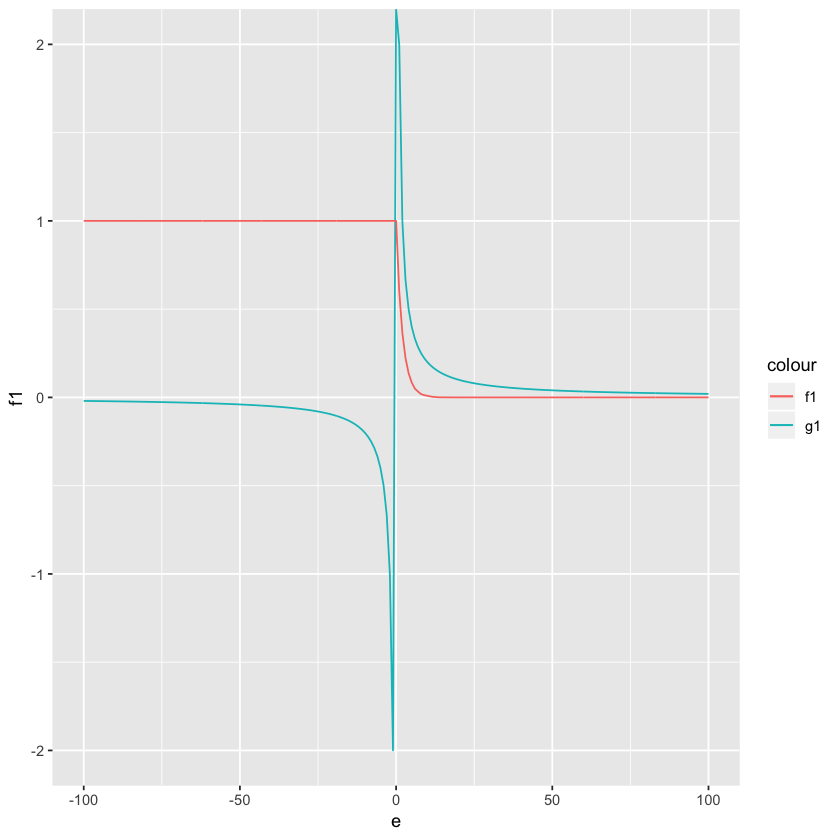

In [15]:
library(ggplot2)
q <- rgamma(5000,1,0.5)
m <- mean(q)
p<-0
f1 <- function(e){
  counter <- 0
  for(i in 1:5000){
    if(q[i] >= e){
      counter = counter + 1
    }
  }
  p <- counter/5000
  return(p)
}
g1 <- function(e){
  return(m/(e))
}

e <- sample(c(-100:100),1000,replace = TRUE)
d <- sapply(e,FUN = f1)
z <- sapply(e,FUN = g1)
dt1 <- data.frame(e= e, f1 = d, g1 = z)
dt2 <- data.frame(e= e, f1 =z)
ggplot(mapping = aes(e,f1)) + 
    geom_line(data = dt2,mapping = aes( colour = "g1")) +  geom_line(data = dt1,mapping = aes( colour = "f1")) 


In [ ]:
نامساوی چبیشف برای مقادیر مثبت به نظر می آید تقریب بهتری است

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال دوم
        </font>
        <hr>
        در این سوال قصد داریم از روی نمونه‌های تصادفی بازی‌های فوتبال لیگ اسپانیا (spanish_league.csv)، اطلاعاتی درباره این لیگ به‌دست آوریم. 
        <ul>
            <li>
                یک نمونه تصادفی با ۱۰۰ داده جمع‌آوری کنید و از روی آن، متوسط تعداد گل‌های زده شده توسط تیم‌های میهمان و تیم‌های میزبان را حساب کنید. آیا انتخاب ۱۰۰ داده اول به عنوان نمونه تصادفی خوب است؟ چرا؟
            </li>
        </ul>
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

In [17]:
dt <- read.csv('spanish_league.csv')
s <- sample(c(1:nrow(dt)),100)
sample <- dt[s,]
sampleVGoals <- mean(sample$visitorGoals)
sampleLGoals <- mean(sample$localGoals)
sampleVGoals
mainVGoals


[1] 1.07

[1] 0.9369532

In [ ]:
می بینیم که تخمینگر خوبی نیست چون کم است و همه در یک بازه زمانی هستند

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
            حال می‌خواهیم احتمال برد یک تیم در خانه حریف را حساب کنیم. برای این‌کار یک نمونه تصادفی با ۱۰۰ داده انتخاب می‌کنیم. می‌دانیم نتیجه این تخمین خود یک متغیر تصادفی است. این آزمایش را ۱۰۰۰ بار تکرار کنید و به کمک آن امید ریاضی و واریانس این تخمین را به دست آورید.
            </li>
        </ul>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

In [20]:
dt <- read.csv('/Users/sana/Downloads/HW4_Practical/spanish_league.csv')
estimator <- function(dt,n,dummy){
s <- sample(c(1:nrow(dt)),n)
sample <- dt[s,]
counter <- 0
for(i in 1:n){
if(sample$visitorGoals[i] < sample$localGoals[i]){
  counter = counter + 1
}
}
return(counter/n)
}
goals <- sapply(c(1:1000), estimator, n = 100,dt =dt)
mean(goals)
var(goals)


[1] 0.50795

[1] 0.002564462

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
            قسمت بالا را برای نمونه‌های تصادفی با اندازه ۵۰، ۱۵۰ و ۲۰۰ نیز تکرار کنید و کاهش واریانس با افزایش اندازه نمونه را مشاهده کنید.
            </li>
        </ul>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

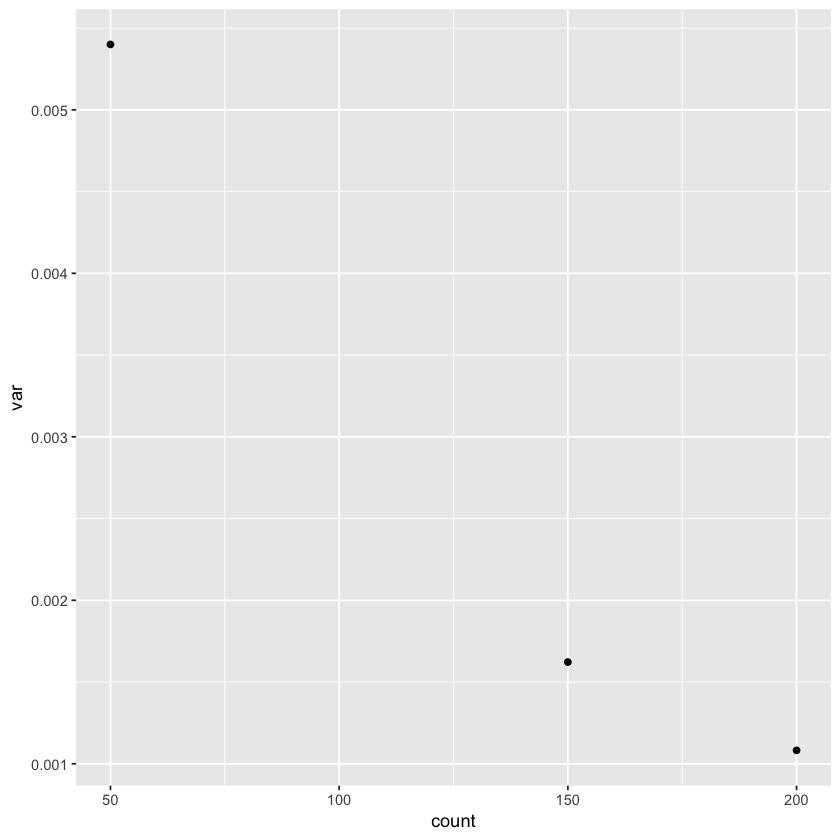

In [21]:
library(ggplot2)
estimates <- function(size){
  goals <- sapply(c(1:1000), estimator, n = size,dt =dt)
  data.frame(count = size, var = var(goals))
}
df <- rbind(estimates(50), estimates(150), estimates(200))
ggplot(df, aes(count, var)) + geom_point()

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال سوم
        </font>
        <hr>
        فرض کنید $X \sim \operatorname{Bernoulli}(p)$. یک تخمین‌گر عجیب و غریب برای $p$ داریم که آن را با $\hat{p}$ نمایش می‌دهیم. $\hat{p}$ به این صورت عمل می‌کند که اگر در بردار تصادفی ورودی آن تعداد یک‌ها بزرگتر مساوی تعداد صفرها بود مقدار ۱ را به عنوان تخمین $p$ گزارش می‌کند و در غیر این صورت مقدار ۰ را برمی‌گرداند.
        <ul>
            <li>
        فرض کنید $p = 0.55$. از طریق تکرار زیاد آزمایش، مقادیر $bias(\hat{p})$، $Var(\hat{p})$ و $MSE(\hat{p})$ را محاسبه کنید. سپس درستی رابطه $MSE(\hat{p}) = Var(\hat{p}) + bias(\hat{p})^2$ را تحقیق کنید.
            </li>
        </ul>
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

In [22]:
p <- 0.55
x <- rbinom(10000, prob = p, size = 1000)
ph <-vector('numeric',10000)
for(i in 1:10000){
  if(x[i] >= 500){
    ph[i] = 1
  }
}
bias <- mean(ph-p)
var <- var(ph)
mse <- mean((ph - p)**2)
var + bias**2
mse

[1] 0.2025701

[1] 0.20257

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
              تخمین‌گر معرفی شده در بالا سازگار (Consistent) است یا خیر؟ چرا؟
            </li>
        </ul>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

In [ ]:
نه. چون مقدار آن یا ۱ است یا صفر ولی در سازگاری باید به ۰.۵۵ میل کند

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال $\hat{p}$ را کمی منطقی‌تر می‌کنیم.
        <div align = "center">
            <font size = 6>
                $\hat{p} = \frac{\sum_{i=1}^{n} X_i}{n}$
            </font>
        </div>
        بدیهی‌است که این تخمین‌گر نااریب (Unbiased) و سازگار است پس باید تخمین‌گر خوبی باشد! پس به کمک آن یک بازه اطمینان برای $p$ به دست می‌آوریم.
        <ul>
            <li>
             به کمک رابطه تئوری مشخص کنید اگر بخواهیم برای $p$ یک بازه اطمینان ۹۵٪ به طول 0.05 به دست آوریم $n$ باید چه مقداری داشته باشد؟ 
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

In [25]:
l <- 0.05
a <- (1 - 0.95) / 2
n <- round(4*(qnorm(1-a)^2)*p*(1-p)/l^2)
n

[1] 1521

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
             آزمایش بالا را ۱۰۰۰۰ بار تکرار کنید. هربار برای محاسبه $\hat{p}$ یک بردار تصادفی $n$تایی درست کنید که مقدار $n$ در بالا به دست آمد. سپس احتمال اینکه بازه اطمینان شامل $p$ باشد را محاسبه کنید. 
            </li>
        </ul>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
	</font>
</div>

In [27]:
x <- rbinom(10000, prob = p, size = n)
y <- ecdf((x - n*p)/sqrt(p*(1-p)*n))
2*y(qnorm(1 - a)) - 1

[1] 0.9476